#### Toshimaku Real Estate Exploratory Data Analysis

Notebook Author: NGUYEN Dai Truong Thanh

Ritsumeikan Asia Pacific University

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

from utils import *
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

%matplotlib inline

print('Libraries imported.')

Libraries imported.


In [5]:
toshima_data = pd.read_csv("toshimaku_cleaned_data.csv", index_col=0)
toshima_data

,Type,"City,Town,Ward,Village",Area,Nearest stationFName,Nearest stationFDistance(minute),Layout,Area(m^2),Year of construction,Building structure,Use,City Planning,Maximus Building Coverage Ratio(%),Maximus Floor-area Ratio(%),Transaction period,Renovation,Transaction-price(total)
0,"Pre-owned Condominiums, etc.",Toshima Ward,Ikebukuro,Ikebukuro,8,1K,15,1985.0,SRC,Other,Commercial Zone,80.0,600.0,2nd quarter 2020,Not yet,12000000
1,"Pre-owned Condominiums, etc.",Toshima Ward,Ikebukuro,Ikebukuro,11,1K,20,2010.0,RC,House,Neighborhood Commercial Zone,80.0,400.0,2nd quarter 2020,Not yet,17000000
2,"Pre-owned Condominiums, etc.",Toshima Ward,Ikebukuro,Ikebukuro,9,1K,20,2012.0,RC,House,Commercial Zone,80.0,500.0,2nd quarter 2020,Unknown,29000000
3,"Pre-owned Condominiums, etc.",Toshima Ward,Ikebukuro,Ikebukuro,10,Unknown,20,2004.0,SRC,Other,Commercial Zone,80.0,400.0,2nd quarter 2020,Not yet,14000000
4,"Pre-owned Condominiums, etc.",Toshima Ward,Ikebukuro,Ikebukuro,11,1K,20,2010.0,RC,House,Neighborhood Commercial Zone,80.0,400.0,2nd quarter 2020,Not yet,18000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8157,Residential Land(Land Only),Toshima Ward,Mejiro,Mejiro,4,Unknown,115,2002.0,Unknown,Other,Category I Exclusively Low-story Residential Zone,60.0,150.0,1st quarter 2013,Unknown,96000000
8158,Residential Land(Land and Building),Toshima Ward,Mejiro,Mejiro,6,Unknown,115,1978.0,LS,House,Category I Exclusively Low-story Residential Zone,60.0,150.0,1st quarter 2013,Unknown,70000000
8159,Residential Land(Land Only),Toshima Ward,Mejiro,Mejiro,9,Unknown,195,2002.0,Unknown,Other,Category I Exclusively Low-story Residential Zone,60.0,150.0,1st quarter 2013,Unknown,120000000
8160,"Pre-owned Condominiums, etc.",Toshima Ward,Mejiro,Mejiro,2,1LDK,35,2007.0,RC,House,Commercial Zone,80.0,500.0,1st quarter 2013,Not yet,32000000


In [7]:
toshima_data.dtypes

Type                                   object
City,Town,Ward,Village                 object
Area                                   object
Nearest stationFName                  object
Nearest stationFDistance(minute)      object
Layout                                 object
Area(m^2)                              object
Year of construction                  float64
Building structure                     object
Use                                    object
City Planning                          object
Maximus Building Coverage Ratio(%)    float64
Maximus Floor-area Ratio(%)           float64
Transaction period                     object
Renovation                             object
Transaction-price(total)                int64
dtype: object

In [16]:
toshima_data["Nearest stationFDistance(minute)"] = toshima_data["Nearest stationFDistance(minute)"].replace("1H30-2H", 100)

In [17]:
toshima_data["Nearest stationFDistance(minute)"] = toshima_data["Nearest stationFDistance(minute)"].replace("1H-1H30", 70)

In [19]:
toshima_data["Nearest stationFDistance(minute)"] = toshima_data["Nearest stationFDistance(minute)"].replace("30-60minutes", 45)

In [21]:
toshima_data["Area(m^2)"] = toshima_data["Area(m^2)"].replace("2,000 m^2 or greater.", 2000)

In [23]:
# change the data types

toshima_data[["Nearest stationFDistance(minute)", "Area(m^2)"]] = toshima_data[["Nearest stationFDistance(minute)", "Area(m^2)"]].astype("int")
toshima_data["Year of construction"] = toshima_data["Year of construction"].astype("int")
toshima_data["Transaction-price(total)"] = toshima_data["Transaction-price(total)"].astype("float")

toshima_data.dtypes

Type                                   object
City,Town,Ward,Village                 object
Area                                   object
Nearest stationFName                  object
Nearest stationFDistance(minute)       int64
Layout                                 object
Area(m^2)                               int64
Year of construction                    int64
Building structure                     object
Use                                    object
City Planning                          object
Maximus Building Coverage Ratio(%)    float64
Maximus Floor-area Ratio(%)           float64
Transaction period                     object
Renovation                             object
Transaction-price(total)              float64
dtype: object

In [30]:
toshima_data.describe()

,Nearest stationFDistance(minute),Area(m^2),Year of construction,Maximus Building Coverage Ratio(%),Maximus Floor-area Ratio(%),Transaction-price(total)
count,8045.000000,8045.000000,8045.000000,8045.000000,8045.000000,8.045000e+03
mean,6.291361,70.551274,1999.004102,70.616532,393.045370,5.900333e+07
std,3.604431,98.530021,12.362193,10.065314,152.854242,1.459746e+08
min,0.000000,10.000000,1946.000000,50.000000,100.000000,6.600000e+05
25%,4.000000,20.000000,1992.000000,60.000000,300.000000,1.900000e+07
50%,6.000000,50.000000,2002.000000,80.000000,400.000000,3.400000e+07
75%,8.000000,75.000000,2007.000000,80.000000,500.000000,5.600000e+07
max,100.000000,2000.000000,2020.000000,80.000000,1200.000000,4.400000e+09


In [33]:
# add "Building Age" column

toshima_data["Building Age"] = 2020 - toshima_data["Year of construction"]

toshima_data.head()

,"City,Town,Ward,Village",Area,Nearest stationFName,Nearest stationFDistance(minute),Layout,Area(m^2),Year of construction,Building structure,Use,City Planning,Maximus Building Coverage Ratio(%),Maximus Floor-area Ratio(%),Transaction period,Renovation,Transaction-price(total),Building Age
0,Toshima Ward,Ikebukuro,Ikebukuro,8,1K,15,1985,SRC,Other,Commercial Zone,80.0,600.0,2nd quarter 2020,Not yet,12000000.0,35
1,Toshima Ward,Ikebukuro,Ikebukuro,11,1K,20,2010,RC,House,Neighborhood Commercial Zone,80.0,400.0,2nd quarter 2020,Not yet,17000000.0,10
2,Toshima Ward,Ikebukuro,Ikebukuro,9,1K,20,2012,RC,House,Commercial Zone,80.0,500.0,2nd quarter 2020,Unknown,29000000.0,8
3,Toshima Ward,Ikebukuro,Ikebukuro,10,Unknown,20,2004,SRC,Other,Commercial Zone,80.0,400.0,2nd quarter 2020,Not yet,14000000.0,16
4,Toshima Ward,Ikebukuro,Ikebukuro,11,1K,20,2010,RC,House,Neighborhood Commercial Zone,80.0,400.0,2nd quarter 2020,Not yet,18000000.0,10


In [34]:
new_column_names = ['Type',
 'City,Town,Ward,Village',
 'Area',
 'Nearest station\x81FName',
 'Nearest station\x81FDistance(minute)',
 'Layout',
 'Area(m^2)',
 'Year of construction',
 'Building structure',
 'Use',
 'City Planning',
 'Maximus Building Coverage Ratio(%)',
 'Maximus Floor-area Ratio(%)',
 'Transaction period',
 'Renovation',"Building Age",
 'Transaction-price(total)']
toshima_data = toshima_data.reindex(columns=new_column_names)
toshima_data.head()

,Type,"City,Town,Ward,Village",Area,Nearest stationFName,Nearest stationFDistance(minute),Layout,Area(m^2),Year of construction,Building structure,Use,City Planning,Maximus Building Coverage Ratio(%),Maximus Floor-area Ratio(%),Transaction period,Renovation,Building Age,Transaction-price(total)
0,NaN,Toshima Ward,Ikebukuro,Ikebukuro,8,1K,15,1985,SRC,Other,Commercial Zone,80.0,600.0,2nd quarter 2020,Not yet,35,12000000.0
1,NaN,Toshima Ward,Ikebukuro,Ikebukuro,11,1K,20,2010,RC,House,Neighborhood Commercial Zone,80.0,400.0,2nd quarter 2020,Not yet,10,17000000.0
2,NaN,Toshima Ward,Ikebukuro,Ikebukuro,9,1K,20,2012,RC,House,Commercial Zone,80.0,500.0,2nd quarter 2020,Unknown,8,29000000.0
3,NaN,Toshima Ward,Ikebukuro,Ikebukuro,10,Unknown,20,2004,SRC,Other,Commercial Zone,80.0,400.0,2nd quarter 2020,Not yet,16,14000000.0
4,NaN,Toshima Ward,Ikebukuro,Ikebukuro,11,1K,20,2010,RC,House,Neighborhood Commercial Zone,80.0,400.0,2nd quarter 2020,Not yet,10,18000000.0


In [35]:
del toshima_data["Type"]

In [50]:
# data normalization

def data_norm(df):
    df = (df - df.min())/(df.max()-df.min())
    return df

attributes_list = ["Nearest stationFDistance(minute)","Area(m^2)","Maximus Building Coverage Ratio(%)","Maximus Floor-area Ratio(%)","Building Age","Transaction-price(total)"]

data_norm = data_norm(toshima_data[attributes_list])

data_norm

,Nearest stationFDistance(minute),Area(m^2),Maximus Building Coverage Ratio(%),Maximus Floor-area Ratio(%),Building Age,Transaction-price(total)
0,0.08,0.002513,1.000000,0.454545,0.472973,0.002578
1,0.11,0.005025,1.000000,0.272727,0.135135,0.003714
2,0.09,0.005025,1.000000,0.363636,0.108108,0.006442
3,0.10,0.005025,1.000000,0.272727,0.216216,0.003032
4,0.11,0.005025,1.000000,0.272727,0.135135,0.003942
...,...,...,...,...,...,...
8157,0.04,0.052764,0.333333,0.045455,0.243243,0.021671
8158,0.06,0.052764,0.333333,0.045455,0.567568,0.015761
8159,0.09,0.092965,0.333333,0.045455,0.243243,0.027127
8160,0.02,0.012563,1.000000,0.363636,0.175676,0.007124


In [84]:
# plot histogram function

def plot_hist(df, xlabel, title):
    plt.figure(figsize=(14,4))

    unique_values = df.unique().tolist()
    count_fig = plt.bar(unique_values, df.value_counts())

    plt.xlabel(xlabel)
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.title(title)

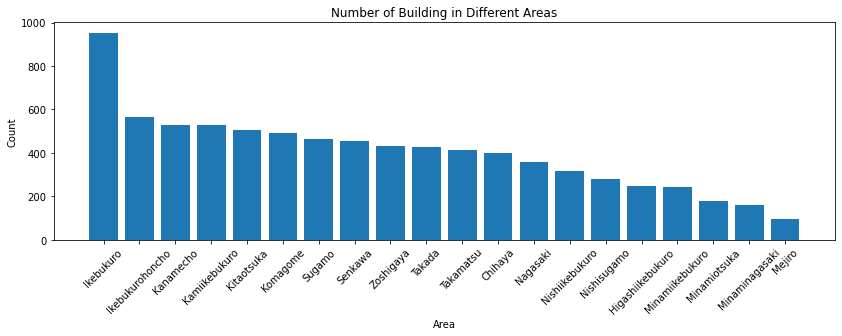

In [86]:
area_hist = plot_hist(toshima_data["Area"], "Area", "Number of Building in Different Areas")

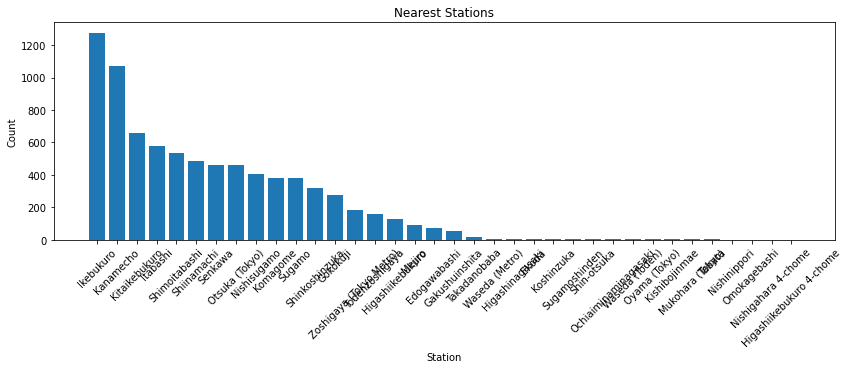

In [88]:
station_hist = plot_hist(toshima_data["Nearest stationFName"], "Station", "Nearest Stations")

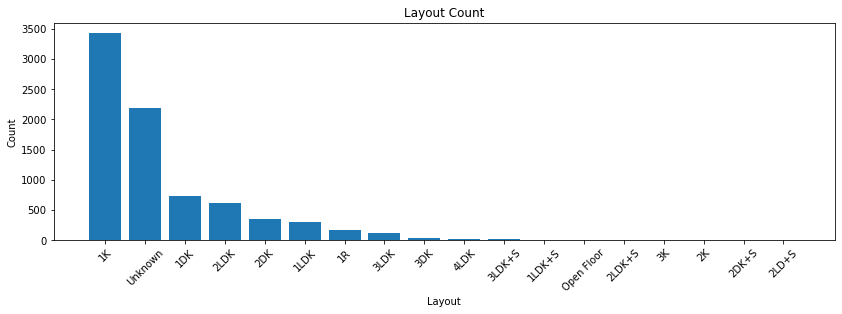

In [89]:
layout_hist = plot_hist(toshima_data["Layout"], "Layout", "Layout Count")

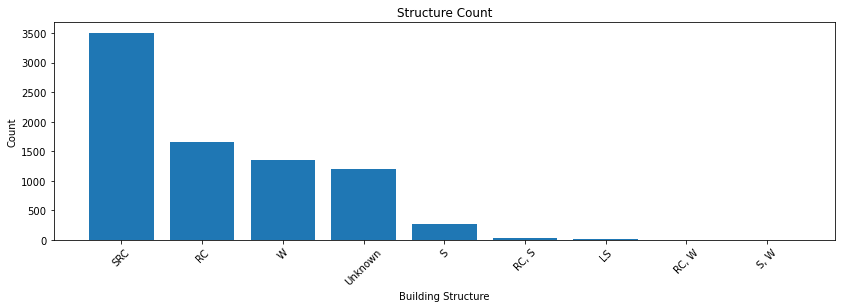

In [90]:
structure_hist = plot_hist(toshima_data["Building structure"], "Building Structure", "Structure Count")

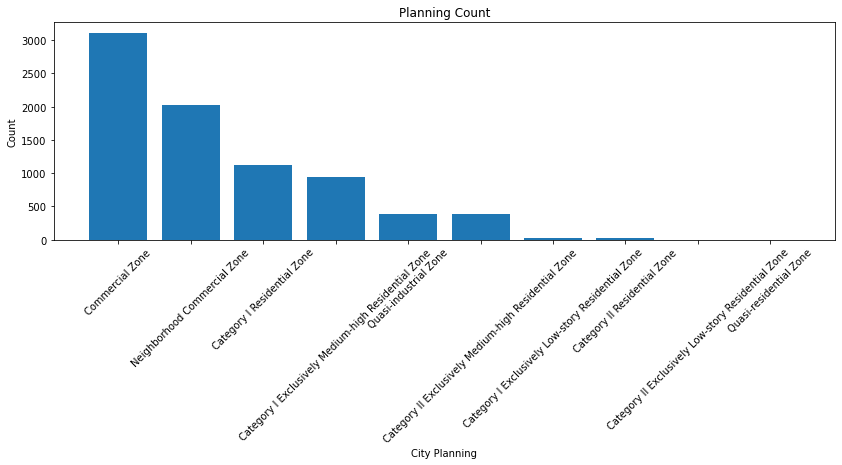

In [93]:
planning_hist = plot_hist(toshima_data["City Planning"], "City Planning", "Planning Count")

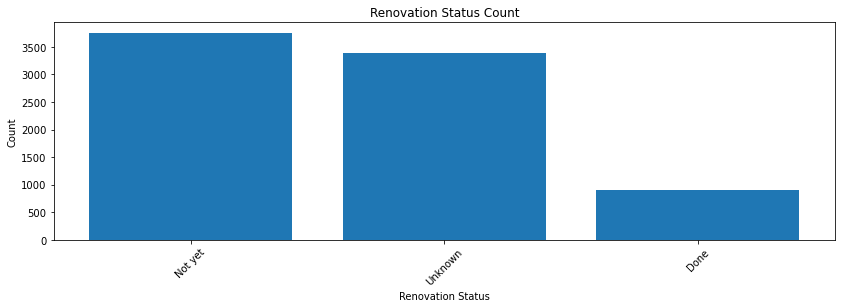

In [94]:
renov_hist = plot_hist(toshima_data["Renovation"], "Renovation Status", "Renovation Status Count")

In [100]:
data_norm.head()

,Nearest stationFDistance(minute),Area(m^2),Maximus Building Coverage Ratio(%),Maximus Floor-area Ratio(%),Building Age,Transaction-price(total)
0,0.08,0.002513,1.0,0.454545,0.472973,0.002578
1,0.11,0.005025,1.0,0.272727,0.135135,0.003714
2,0.09,0.005025,1.0,0.363636,0.108108,0.006442
3,0.10,0.005025,1.0,0.272727,0.216216,0.003032
4,0.11,0.005025,1.0,0.272727,0.135135,0.003942
